In [1]:
import matplotlib.pyplot as plt
from pykowski.karambola import KarambolaResults
import numpy as np
import json
import os
from collections import defaultdict
%matplotlib inline
from mpltools import annotation

In [12]:
sample_names =["beadpack", "beadpack_smooth"]

In [13]:
minkowski_data = {}
for sample_name in sample_names:
    minkowski_data[sample_name] = {}
    
    json_files = []
    
    for file in os.listdir("minkowski_results/karambola_output/"+sample_name):
        if file.endswith(".json"):
            json_files.append(file)

    dxs = []
    results = []
    for file_name in json_files:
        data = None
        with open("minkowski_results/karambola_output/"+sample_name+"/"+file_name, 'r') as f:
            for row in f:
                data = row
        name = file_name.split("_")
        dx = int(name[0])
        json_data = json.loads(data)
        karam_res = KarambolaResults()
        karam_res.load_from_json_format(json_data)
        #if karam_res.w202 is not 'ERROR' and karam_res.w102 is not 'ERROR':
        try:
            karam_res.compute_eigenvalues()
            dxs.append(dx)
            results.append(karam_res)
        except:
            print "Non-Manifold mesh in "+file_name

    w102s = [x.w102/x.w100 for x in results]
    beta_102s = [x.beta_102 for x in results]
    beta_202s = [x.beta_202 for x in results]
    gamma_102s = [x.gamma_102 for x in results]
    gamma_202s = [x.gamma_202 for x in results]

    dxs_sorted = sorted(dxs)
    w102s_sorted = [x for (y,x) in sorted(zip(dxs, w102s))]
    beta_102s_sorted = [x for (y,x) in sorted(zip(dxs, beta_102s))]
    beta_202s_sorted = [x for (y,x) in sorted(zip(dxs, beta_202s))]
    gamma_102s_sorted = [x for (y,x) in sorted(zip(dxs, gamma_102s))]
    gamma_202s_sorted = [x for (y,x) in sorted(zip(dxs, gamma_202s))]
    minkowski_data[sample_name]["dx"] = dxs_sorted
    minkowski_data[sample_name]["w102"] = w102s_sorted
    minkowski_data[sample_name]["beta_102"] = beta_102s_sorted
    minkowski_data[sample_name]["beta_202"] = beta_202s_sorted
    minkowski_data[sample_name]["gamma_102"] = gamma_102s
    minkowski_data[sample_name]["gamma_202"] = gamma_202s

Non-Manifold mesh in 496_496_496.json


In [19]:
title_size = 36
xLabel_size = 34
yLabel_size = xLabel_size
tick_mark_label_size = 28
legend_size = 28
line_width = 6
bbox = (0., 0.2, 1.0, .102)
bbox_comp = (0., 0.25, 0.95, .102)
gamma_alpha = 0.6

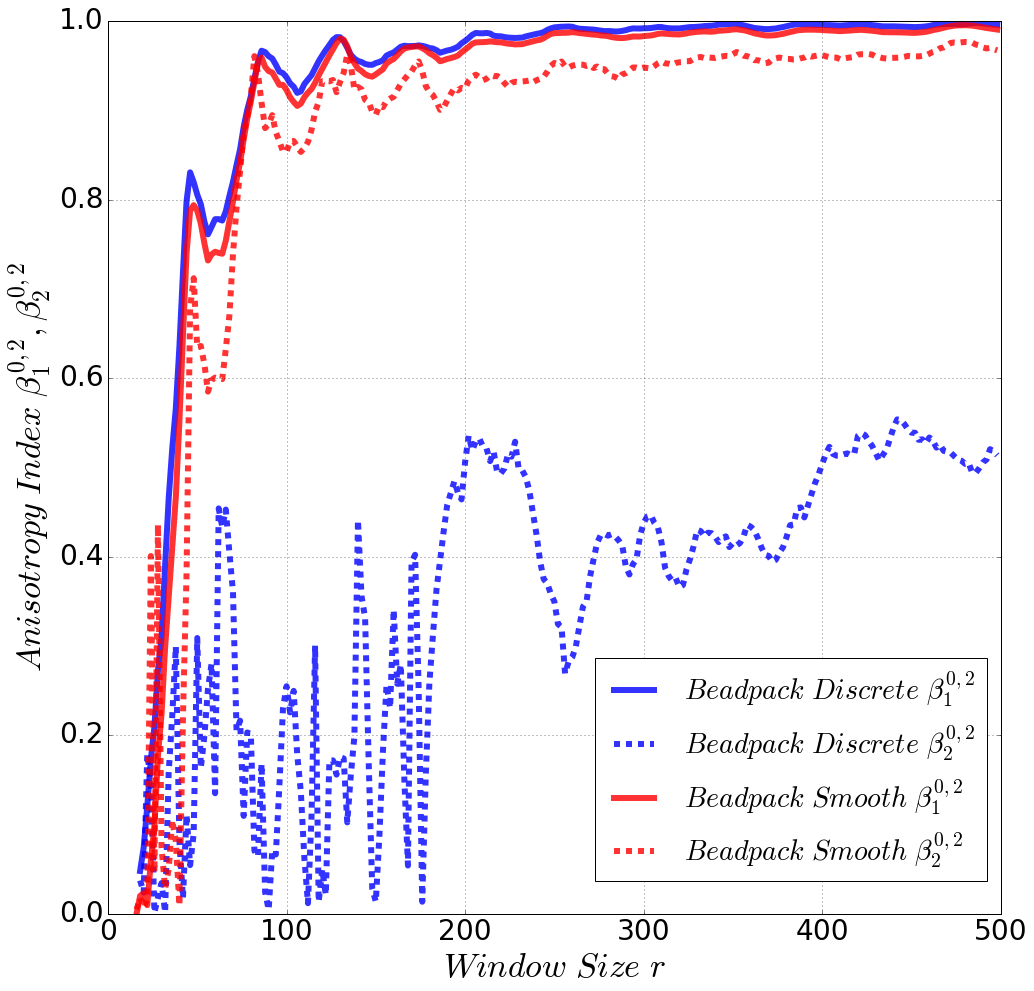

In [22]:
fig, ax = plt.subplots(figsize=(16,16))


#ax.set_title(r'$Anisotropy \ Index \ \beta_{1}^{0,2} \ versus \ Window \ Size \ r$', fontsize=title_size, y=1.02)

ax.set_xlabel(r'$Window \ Size \ r$', fontsize=xLabel_size)
ax.set_ylabel(r'$Anisotropy \ Index \ \beta_{1}^{0,2}, \beta_{2}^{0,2}$', fontsize=yLabel_size)

for sample_name, color, labels in zip(sample_names, ["blue", "red"], [[r'$Beadpack \ Discrete \ \beta_{1}^{0,2}$', r'$Beadpack \ Discrete \ \beta_{2}^{0,2}$'], [r'$Beadpack \ Smooth \ \beta_{1}^{0,2}$', r'$Beadpack \ Smooth \ \beta_{2}^{0,2}$']]):
    dx = minkowski_data[sample_name]["dx"]
    ax.set_xlim(0, dx[-1]+2)
    ax.set_ylim(0.0, 1.0)
    beta1 = minkowski_data[sample_name]["beta_102"]
    beta2 = minkowski_data[sample_name]["beta_202"]
    ax.plot(dx, beta1, label=labels[0], alpha=0.8, linestyle="-", linewidth=line_width, color=color)
    ax.plot(dx, beta2, label=labels[1], alpha=0.8, linestyle="--", linewidth=line_width, color=color)
      
for item in ax.get_xticklabels():
    item.set_fontsize(tick_mark_label_size)
for item in ax.get_yticklabels():
    item.set_fontsize(tick_mark_label_size)

plt.grid()

legend = plt.legend(bbox_to_anchor=bbox, fontsize=legend_size)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

fig.savefig("minkowski_results/minkowski_ball_figures/minkowski_smooth_rough_comparison.png", bbox_extra_artists=None, bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [29]:
print minkowski_data["beadpack"]["w102"][-1]
print ""
print minkowski_data["ketton"]["w102"][-1]
print ""
print minkowski_data["estaillades"]["w102"][-1]

[[  3.33172625e-01   3.27044167e-04  -2.39223338e-04]
 [  3.27044167e-04   3.33988026e-01  -1.71854777e-04]
 [ -2.39223338e-04  -1.71854777e-04   3.32839350e-01]]

[[ 0.30629152  0.02524857 -0.00302229]
 [ 0.02524857  0.32197558  0.00437719]
 [-0.00302229  0.00437719  0.3717329 ]]

[[ 0.31556637 -0.003963   -0.00213517]
 [-0.003963    0.32081155  0.00401117]
 [-0.00213517  0.00401117  0.36362208]]


In [30]:
print minkowski_data["beadpack"]["beta_102"][-1]
print minkowski_data["ketton"]["beta_102"][-1]
print minkowski_data["estaillades"]["beta_102"][-1]

0.995708532162
0.77230258657
0.860798005887
